#Assignment-3

#Mayura Parge
#R00182985

# Introduction

First import the packages which are reuqired for image processing like open cv, for computation numpy
Then for building model use sklearn pakcage


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np 
import matplotlib.pyplot as plt 
import pickle 
import pandas as pd 
import random 
import cv2  as cv
import os
from sklearn.decomposition import PCA
from matplotlib import image 
#knnclassifer
from sklearn.neighbors import  KNeighborsClassifier 

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


#Read image files using os.listdir

Here using enlarging the image so using interpolation is INTER_CUBIC.
57

The normType is NORM_MINMAX, cv::normalize normalizes  the min value of is alpha and max value of dst is beta
cv::normalize does scales and shifts (i.e. adding constants and multiplying by constants).


In [18]:
filenames = os.listdir(r"C:\\Users\\Mayura\\Documents\\ML\\Project3_files\\Project3_files\\data\\train1" ) 
categories = []
loadedimage = []
res_out_img = []
norm_img_out = []
for filename in filenames: 
    category = filename.split('.')[0] 
    #classifiy the dog and cat : 1 , 0 respectively
    if category == 'dog': 
     categories.append(1) 
    else: 
     categories.append(0) 
    #read the image using opencv 
    img   = cv.imread("C:\\Users\\Mayura\\Documents\\ML\\Project3_files\\Project3_files\\data\\train1\\"+filename)         
    res = cv.resize(img ,(350,350),interpolation = cv.INTER_CUBIC) 
    #final_img = cv.normalize(res,   alpha=1,  beta=0, cv.NORM_MINMAX) 
    #normalize the read image with 0 to 1 range 
    res_out_img.append(res)
    norm_img = cv.normalize(res, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    norm_img_out.append(norm_img)
    #convert flattern the array means 3D width,height, channel  to 1d array 
    flat_arry = np.array(norm_img.flatten())
    #create the list so which can we use for np.array to convert 
    loadedimage.append(flat_arry) 

#convert
df = pd.DataFrame({ 
 'filename': filenames, 
 'category': categories 
}) 

#convert the list to np.array for pca
img_array = np.array(loadedimage)
print(img_array.shape)

(502, 367500)


#show resize image 

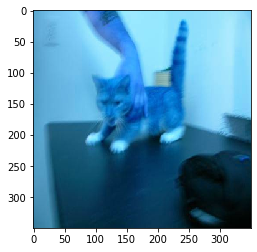

In [11]:
plt.imshow(res_out_img[0])

#show normalize image

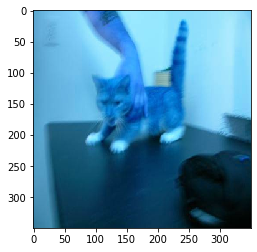

In [15]:
plt.imshow(norm_img_out[0])

In [20]:
#import the pca
from sklearn.decomposition import PCA

In [19]:
pca = PCA( n_components=0.95)
image_pca = pca.fit(img_array)

In [20]:
x_image = image_pca.transform(img_array)

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [21]:
# partition the dataset into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x_image, df.category, test_size = 0.2, random_state = 985, stratify=df.category)

In [22]:
print('Number of Training Set samples:', len(X_train))
print('Number of Test Set samples:', len(X_test))


Number of Training Set samples: 401
Number of Test Set samples: 101


In [23]:
print(x_image.shape)

(502, 262)


Run KNeighborsClassifier to check test and predict the classification on x_train and y_test

The accuracy is 57.42% 

In [24]:
from sklearn.neighbors import KNeighborsClassifier as knn

model = KNeighborsClassifier()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
#Predict the response for test dataset
predicted= model.predict(X_test) 

print(metrics.accuracy_score(y_test, predicted))

0.5742574257425742


#Build the model for SVM, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, LogisticRegression

In [26]:
# Build various  models with default Hyperparameters

# Build the Adaboost CLASSIFIER 
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier()
# Build the KNN model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Build the logistic regression model 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

# Build the Random  forest model 
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()

#build decisionTreeClassifier
decisionTreeClassifier = tree.DecisionTreeClassifier()


#calculate the accuracy and f1 score for each model 

In [27]:

model_names = ['KNN', 'Logistic Regression',   'Random forest', 'Ada Boost', 'DecisionTreeClassifier']
models = [knn, logistic, randomForest,  adaBoost,decisionTreeClassifier]

from sklearn.model_selection import cross_val_score
# Evaluating the performance of the different models 
for model_name, model in zip(model_names, models):
     print("*************************************************************")
     print("Model name :{}".format(model_name))
     print("*************************************************************")
     for score in ["accuracy", "precision", "recall", "f1"]:
         # Apply k-fold cv on balanced training dataset 
         scores = cross_val_score(model, X_train, y_train, cv=10, scoring=score)
         np_scores=np.array(scores)
         # calculate   mean of accuracy  
         mean_score = np.mean(np_scores)
         print("The mean {} score is: {} ".format(score, mean_score))
     print("\n")


*************************************************************
Model name :KNN
*************************************************************
The mean accuracy score is: 0.5786585365853659 
The mean precision score is: 0.57238599856045 
The mean recall score is: 0.6316666666666666 
The mean f1 score is: 0.5978205738874243 


*************************************************************
Model name :Logistic Regression
*************************************************************
The mean accuracy score is: 0.5237195121951219 
The mean precision score is: 0.542127133691005 
The mean recall score is: 0.5123809523809524 
The mean f1 score is: 0.5195002942658248 


*************************************************************
Model name :Random forest
*************************************************************
The mean accuracy score is: 0.5334756097560976 
The mean precision score is: 0.5810750103010165 
The mean recall score is: 0.4428571428571429 
The mean f1 score is: 0.4774902880347526

*Model name :Ada Boost  : 56.70 with accuracy 57.34%  and DecisionTreeClassifier accuracy : 51.10% and f1 score is 51.86%

After checking the w/o tunning model result we can see the randomforest, adaboost has promising result caomparing
to other models.

# hyper param tunning for models 


Build the DecisionTreeClassifier with param tunning

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# Create Parameter Space
# Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = [1,5,10,20]

# Create lists of parameter for Decision Tree Classifier
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3,5,7,9,10],
              "max_features": [2,4,6,8,12],
              "min_samples_leaf": [2,4],
              "criterion": ["gini", "entropy"]}

# Conduct Parameter Optmization With 
# Create a grid search object
clf = RandomizedSearchCV(decisionTreeClassifier,  param_distributions=param_dist)#n_components,criterion,max_depth)

# Fit the grid search
clf.fit(X_train, y_train)

print("The best parameters for random forest:\n", clf.best_params_)
print("The best score for random forest:\n", clf.best_score_)

The best parameters for random forest:
 {'min_samples_leaf': 4, 'max_features': 6, 'max_depth': 9, 'criterion': 'gini'}
The best score for random forest:
 0.543640897755611


C:\Users\Mayura\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


After applying the tunned param to DecisionTreeClassifier building the model 
The accuracy here is : 52.47%

In [39]:
tunedDF = DecisionTreeClassifier(min_samples_leaf= 4, max_features= 6, max_depth= 9, criterion= "gini")
   
tuned_dt = tunedDF.fit(X_train, y_train)

predict_result= tuned_dt.predict(X_test)
      
accuracy = accuracy_score(predict_result, y_test) * 100

print(accuracy)

52.475247524752476


#Random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with
the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

The result for best model accuracy  : 60.09%

In [29]:
#hyprt tune the parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = { 
    'n_estimators': [10, 100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'bootstrap': [True,False],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

randomForest = RandomForestClassifier()
rand = RandomizedSearchCV(randomForest, param_distributions=parameters, cv=10, scoring='accuracy', n_iter=50, random_state=5)
rand.fit(X_train, y_train)
print("The best parameters for random forest:\n", rand.best_params_)
print("The best score for random forest:\n", rand.best_score_)

C:\Users\Mayura\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters for random forest:
 {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
The best score for random forest:
 0.600997506234414


#tuned random forest

tunned random forest : 51.48%

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


tunedRF = RandomForestClassifier(bootstrap= True, max_depth=30, max_features= 'log2',
                                     min_samples_leaf= 4, min_samples_split= 2, n_estimators= 400, random_state=0)
    
tuned_rf = tunedRF.fit(X_train, y_train)

predict_result= tuned_rf.predict(X_test)
      
accuracy = accuracy_score(predict_result, y_test) * 100

print(accuracy)

51.48514851485149


In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

ada=AdaBoostClassifier()
search_grid={'n_estimators':[100,250,500],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=10)
search.fit(X_train, y_train)
print("The best parameters are:\n", search.best_params_)
print("The best score is:\n", search.best_score_)


C:\Users\Mayura\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters are:
 {'learning_rate': 0.1, 'n_estimators': 100}
The best score is:
 0.5910224438902744


the tunned adaboostclassifiers : 48.51%

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

tuneadAdaboost = AdaBoostClassifier(learning_rate= 0.1, n_estimators=100, random_state=0 ) 
tuned_ada = tuneadAdaboost.fit(X_train, y_train)

predict_result= tuned_ada.predict(X_test)
      
accuracy = accuracy_score(predict_result, y_test) * 100

print(accuracy)

48.51485148514851


#Predict the result on test dataset 

Here no need to check the label as , model should predict the 

In [48]:
filenames_test = os.listdir(r"C:\\Users\\Mayura\\Documents\\ML\\Project3_files\\Project3_files\\data\\test" ) 
categories = []
loadedimage_test = []
for filename in filenames_test: 
    img   = cv.imread("C:\\Users\\Mayura\\Documents\\ML\\Project3_files\\Project3_files\\data\\test\\"+filename)         
    res = cv.resize(img ,(350,350),interpolation = cv.INTER_CUBIC) 
    #final_img = cv.normalize(res,   alpha=1,  beta=0, cv.NORM_MINMAX) 
    
    norm_img = cv.normalize(res, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    flat_arry = np.array(norm_img.flatten())
    loadedimage_test.append(flat_arry) 


img_array_test = np.array(loadedimage_test)
print(img_array.shape)

(502, 367500)


In [49]:
x_image_test = image_pca.transform(img_array_test)

In [50]:
print(x_image.shape)

(502, 262)


To predict the test dataset of images applying the models to test data

In [57]:

models = [tuned_rf, tuned_dt, tuned_ada]
models_names = ['tuned_rf', 'decisiontree','adaboost']

predict_result = tuned_rf.predict(x_image_test)
print("########",tuned_rf,"###############")
print("The predicted result is : ",predict_result)
predict_result1 = np.array(predict_result)
print("Predicted result times",  np.sum(predict_result1==1)) 


######## RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False) ###############
The predicted result is :  [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted result times 15


In [60]:

predict_result = tuned_ada.predict(x_image_test)
print("########",tuned_ada,"###############")
print("The predicted result is : ",predict_result)
predict_result1 = np.array(predict_result)
print("Predicted result times",  np.sum(predict_result1==1)) 

######## DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') ###############
The predicted result is :  [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0]
Predicted result times 27


In [61]:

predict_result = tuned_dt.predict(x_image_test)
print("########",tuned_dt,"###############")
print("The predicted result is : ",predict_result)
predict_result1 = np.array(predict_result)
print("Predicted result times",  np.sum(predict_result1==1)) 

######## DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') ###############
The predicted result is :  [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0]
Predicted result times 27


In [97]:
predict_result1 = np.array(predict_result)
print("Predicted result times",  np.sum(predict_result1==1)) 

Predicted result times 35


The model is underfitting as the predicted value of dogs is less than actual.